In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Data Loading and Filtering

In [2]:
df = pd.read_csv('../zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
del df['MemberName'], df['CourseName']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CapstoneScore
0,3,79.9,43.7,2,0,62.8,5.0,45.3
1,2,76.8,95.6,6,0,87.4,2.7,78.8
2,3,96.6,75.9,8,0,98.4,2.8,65.4
4,2,83.2,24.0,6,0,41.8,4.2,40.1
7,3,86.5,88.0,5,0,23.9,1.3,68.2


In [3]:
Y = df['CapstoneScore'].values
X_df = df.drop(columns=['CapstoneScore'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X = X_standardized.values

In [4]:
X = np.column_stack((
    np.ones(len(df)),
    X
))

#### Compute Cost

In [5]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

#### Optimization

In [6]:
cost_history=[]
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


#### Checking

In [7]:
beta = np.random.randn(8)
n_iter = 1000
lr = 0.01

In [8]:
beta = gradient_descent(X,Y,beta,n_iter,lr)

iteration: 0, beta:[-0.4343672   0.91407291 -0.32400461  0.15272347  1.97322601  1.45038659
 -0.37237457 -0.28745084], cost:1686.86156192023
iteration: 100, beta:[34.77790862 -0.12478535  0.35367531 10.07491652  1.70271625 -0.15910721
  0.73843368  1.08305898], cost:235.65232765993403
iteration: 200, beta:[47.66674038 -0.28145367  0.58933603 13.74918295  0.94967181 -0.22510657
  0.86120665  1.55716599], cost:41.25832481871341
iteration: 300, beta:[ 5.23844696e+01 -2.97793321e-01  6.76814968e-01  1.51890571e+01
  4.25711448e-01 -5.10180064e-02  8.70205473e-01  1.67178958e+00], cost:14.73991628685032
iteration: 400, beta:[54.11131113 -0.30504158  0.71334705 15.77955568  0.12543092  0.10029027
  0.88674115  1.67528171], cost:11.040768731957753
iteration: 500, beta:[ 5.47433910e+01 -3.16031194e-01  7.30472902e-01  1.60306684e+01
 -3.68611155e-02  1.98837990e-01  9.10077445e-01  1.65586899e+00], cost:10.505558498818658
iteration: 600, beta:[54.97475262 -0.32738512  0.73908067 16.14067674 -0

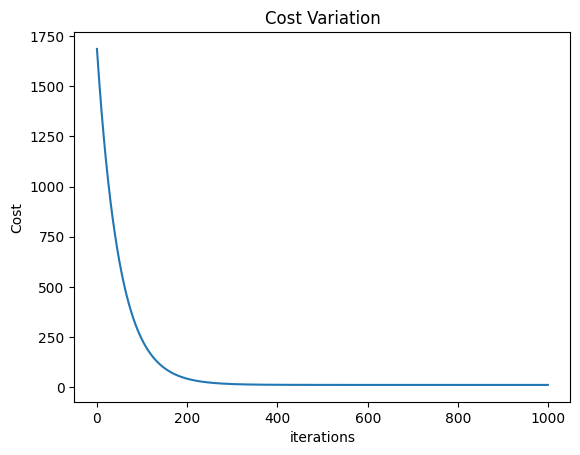

In [9]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Model Evaluation

In [10]:
Y_hat = X.dot(beta) 
Y_hat

array([49.966515  , 79.29198061, 68.47906024, 36.5678562 , 71.0554729 ,
       82.3014154 , 38.24676319, 56.22606231, 48.82324261, 45.57551543,
       59.96330947, 36.71609027, 39.52513204, 49.96487393, 56.82323303,
       30.83950646, 83.74552241, 28.99873786, 52.48798223, 75.82742745,
       64.95153209, 42.13280269, 34.63911596, 79.91835046, 79.33171916,
       36.87428521, 44.72336448, 43.1193367 , 49.58346215, 38.67434086,
       78.49578192, 39.95887854, 28.17257351, 61.44017077, 65.93436176,
       68.14756439, 29.38694758, 42.32893745, 32.5849577 , 61.16348192,
       62.67538   , 70.36325438, 56.33680173, 70.29119112, 54.5785783 ,
       57.15253167, 51.88443004, 32.9031998 , 59.5770516 , 43.66374963,
       77.67873894, 39.47077246, 50.90696012, 76.61056851, 60.55857132,
       78.90723734, 75.19634218, 58.44568086, 70.87829561, 72.62751872,
       26.90291693, 51.79871275, 47.81889561, 79.69012371, 44.56697226,
       56.54725163, 67.40956191, 47.80163964, 82.4420031 , 42.93

In [11]:
def MSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(e_i**2)

def MAE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y,Y_hat):
    y_mean = np.mean(Y)
    e_i = Y - Y_hat
    std_i = Y - y_mean

    E = np.sum(e_i**2) / np.sum(std_i ** 2)
    return 1 - E

In [12]:
mse = MSE(Y, Y_hat)
mae = MAE(Y, Y_hat)
r2 = R2_Score(Y, Y_hat)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")

MSE : 20.810561818387313
MAE : 3.5383479792306924
R2 Score : 0.9271667385220356


In [13]:
lr_model = LinearRegression()
lr_model.fit(X[:, 1:], Y)  # skip the intercept column since sklearn adds it internally

print("Sklearn coefficients:", lr_model.coef_)
print("Sklearn intercept:", lr_model.intercept_)

Sklearn coefficients: [-0.35523215  0.7477395  16.23362197 -0.22249773  0.33544015  0.97752925
  1.61270231]
Sklearn intercept: 55.10833333333334
